In [6]:
import pandas as pd
import numpy as np
import csv

import statsmodels.api as sm

In [ ]:
df = pd.read_csv('TrackingtheSun2018_Data_Public_4-Oct-2018_p1.csv')

In [ ]:
df2 = pd.read_csv('TrackingtheSun2018_Data_Public_4-Oct-2018_p2_UTF8.csv')

In [ ]:
est = sm.OLS(y.astype(float), X.astype(float)).fit()


In [ ]:
# Feature engineering - part 1
# Create a cost_per_kwp column (our target)

df['cost_per_kwp'] = df['Total Installed Price'] / df['System Size']

In [9]:
df.describe()

,System Size,Total Installed Price,Sales Tax Cost,Rebate or Grant,Performance-Based Incentive (Annual Payment),Performance-Based Incentives (Duration),Feed-in Tariff (Annual Payment),Feed-in Tariff (Duration),New Construction,Tracking,...,Module Efficiency #3,Inverter Quantity #1,Inverter Quantity #2,Inverter Quantity #3,Additional inverter model,Microinverter #1,Microinverter #2,Microinverter #3,DC Optimizer,cost_per_kwp
count,7.000000e+05,7.000000e+05,700000.000000,7.000000e+05,7.000000e+05,700000.000000,700000.0,700000.0,700000.000000,700000.000000,...,700000.000000,700000.0,700000.0,700000.0,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,7.000000e+05
mean,2.781393e+01,3.848947e+04,-1463.133529,1.088230e+03,3.075919e+02,0.044653,0.0,0.0,-7598.301297,-2778.062960,...,-9993.971856,-9999.0,-9999.0,-9999.0,-1910.722954,-1673.156151,-9621.234640,-9980.401789,-1539.632223,4.299589e+03
std,5.400954e+03,5.765185e+06,8854.347705,8.335562e+04,8.374055e+03,0.731614,0.0,0.0,4271.024006,4478.868944,...,224.169479,0.0,0.0,0.0,3931.218779,3732.684819,1906.464204,430.834774,3609.121414,8.047828e+05
min,6.800000e-02,-9.999000e+03,-9999.000000,-9.999000e+03,0.000000e+00,0.000000,0.0,0.0,-9999.000000,-9999.000000,...,-9999.000000,-9999.0,-9999.0,-9999.0,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-1.470441e+05
25%,4.000000e+00,3.000000e+03,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,-9999.000000,-9999.000000,...,-9999.000000,-9999.0,-9999.0,-9999.0,0.000000,0.000000,-9999.000000,-9999.000000,0.000000,5.102041e+02
50%,5.720000e+00,2.090000e+04,388.757900,0.000000e+00,0.000000e+00,0.000000,0.0,0.0,-9999.000000,0.000000,...,-9999.000000,-9999.0,-9999.0,-9999.0,0.000000,0.000000,-9999.000000,-9999.000000,0.000000,4.200000e+03
75%,8.000000e+00,3.283500e+04,728.818612,7.755000e+02,0.000000e+00,0.000000,0.0,0.0,-9999.000000,0.000000,...,-9999.000000,-9999.0,-9999.0,-9999.0,0.000000,0.000000,-9999.000000,-9999.000000,0.000000,5.120000e+03
max,4.001172e+06,4.806585e+09,655574.388500,6.700000e+07,1.742083e+06,20.000000,0.0,0.0,1.000000,1.000000,...,0.220762,-9999.0,-9999.0,-9999.0,1.000000,1.000000,1.000000,1.000000,1.000000,6.717799e+08


In [14]:
df.dtypes

Data Provider                                    object
System ID (from Data Provider)                   object
System ID (Tracking the Sun)                     object
Installation Date                                object
System Size                                     float64
Total Installed Price                           float64
Appraised Value Flag                               bool
Sales Tax Cost                                  float64
Rebate or Grant                                 float64
Performance-Based Incentive (Annual Payment)    float64
Performance-Based Incentives (Duration)           int64
Feed-in Tariff (Annual Payment)                   int64
Feed-in Tariff (Duration)                         int64
Customer Segment                                 object
New Construction                                  int64
Tracking                                          int64
Tracking Type                                    object
Ground Mounted                                  

In [17]:
y1 = df['cost_per_kwp'].astype(float)
x1 = df[['System Size','Total Installed Price']].astype(float)

x = sm.add_constant(x1)

results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           cost_per_kwp   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.540e+08
Date:                Mon, 23 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:11:02   Log-Likelihood:            -8.3808e+06
No. Observations:              700000   AIC:                         1.676e+07
Df Residuals:                  699997   BIC:                         1.676e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1064.8819     45.799    -23.251      0.000   -1154.647    -975.116
System Size              -0.0834      0.008     -9.832      0.000      -0.100      -0.067
Total Installed Price     0.1394   7.94e-06   1.76e+04      0.000       0.139       0.139
===============================================================================
Omnibus:                  2044658.953   Durbin-Watson:                    1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   113499276168281.797
Skew:                          38.260   Prob(JB):                          0.00
Kurtosis:                   62384.070   Cond. No.                      5.77e+06
===============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
df.shape, df2.shape

((700000, 64), (498663, 63))

In [19]:
masker = pd.concat([df, df2])

C:\Users\evang\Anaconda3\envs\Unit2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [20]:
df = masker
print(df.shape)

(1198663, 64)


In [21]:
# Feature engineering - part 2

drop_columns = ['Tilt #2', 'Inverter Quantity #1', 'Tilt #3', 'Azimuth #3', 
                'Azimuth #2', 'Inverter Quantity #3', 'Inverter Quantity #2', 
                'Module Efficiency #3', 'BIPV Module #3', 'Microinverter #3',
                'Module Efficiency #2', 'BIPV Module #2', 
                'Microinverter #2', 'Self-Installed']

high_nan_columns = ['Tracking', 'Ground Mounted', 'Battery System', 'New Construction', 'Azimuth #1', 'Tilt #1']

high_cardinality_cols = ['System ID (from Data Provider)', 'System ID (Tracking the Sun)']

In [22]:
# Create a "Year" column
df['Installation Date'] = pd.to_datetime(df['Installation Date'], infer_datetime_format=True)

In [23]:
df['Year_Installed'] = df['Installation Date'].dt.year
df['Month_Installed'] = df['Installation Date'].dt.month
df['Day_Installed'] = df['Installation Date'].dt.day

In [24]:
df = df.drop(columns='Installation Date')

In [25]:
df.describe()

,Additional inverter model,Additional module model,Azimuth #1,Azimuth #2,Azimuth #3,BIPV Module #1,BIPV Module #2,BIPV Module #3,Battery System,DC Optimizer,...,Tilt #1,Tilt #2,Tilt #3,Total Installed Price,Tracking,Zip Code,cost_per_kwp,Year_Installed,Month_Installed,Day_Installed
count,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,...,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,1.198663e+06,7.000000e+05,1.198663e+06,1.198663e+06,1.198663e+06
mean,-3.059452e+03,-3.030420e+03,-5.626631e+03,-9.714117e+03,-9.898240e+03,-2.190209e+03,-9.592020e+03,-9.890749e+03,-8.756064e+03,-2.023932e+03,...,-4.649186e+03,-9.718615e+03,-9.890318e+03,4.044617e+04,-3.619726e+03,6.989649e+04,4.299589e+03,2.014230e+03,6.763919e+00,1.569863e+01
std,4.607737e+03,4.595408e+03,5.039877e+03,1.679328e+03,1.007847e+03,4.135570e+03,1.975794e+03,1.034741e+03,3.298975e+03,4.017800e+03,...,4.998455e+03,1.652668e+03,1.037849e+03,4.419359e+06,4.805339e+03,3.861129e+04,8.047828e+05,2.702619e+00,3.465491e+00,8.883552e+00
min,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,...,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-1.470441e+05,1.998000e+03,1.000000e+00,1.000000e+00
25%,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,0.000000e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,0.000000e+00,...,-9.999000e+03,-9.999000e+03,-9.999000e+03,1.101617e+04,-9.999000e+03,6.101000e+04,5.102041e+02,2.013000e+03,4.000000e+00,8.000000e+00
50%,0.000000e+00,0.000000e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,0.000000e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,0.000000e+00,...,1.000000e+01,-9.999000e+03,-9.999000e+03,2.304100e+04,0.000000e+00,9.202800e+04,4.200000e+03,2.015000e+03,7.000000e+00,1.600000e+01
75%,0.000000e+00,0.000000e+00,1.800000e+02,-9.999000e+03,-9.999000e+03,0.000000e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,0.000000e+00,...,2.100000e+01,-9.999000e+03,-9.999000e+03,3.485000e+04,0.000000e+00,9.363500e+04,5.120000e+03,2.016000e+03,1.000000e+01,2.300000e+01
max,1.000000e+00,1.000000e+00,3.600000e+02,3.600000e+02,3.600000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.350000e+02,2.250000e+02,9.000000e+01,4.806585e+09,1.000000e+00,9.791800e+04,6.717799e+08,2.017000e+03,1.200000e+01,3.100000e+01


In [26]:
df.describe(exclude='number')

,Appraised Value Flag,City,County,Customer Segment,Data Provider,Installer Name,Inverter Manufacturer #1,Inverter Manufacturer #2,Inverter Manufacturer #3,Inverter Model #1,...,Module Model #2,Module Model #3,Module Technology #1,Module Technology #2,Module Technology #3,State,System ID (Tracking the Sun),System ID (from Data Provider),Tracking Type,Utility Service Territory
count,1198663,1198663,1198663,1198663,1198663,1198663,1198663,1198663,1198663,1198663,...,1198663,1198663,1198663,1198663,1198663,1198663,1198663,1198663,1198663,1198663
unique,2,9715,557,8,50,12213,142,82,47,1269,...,1987,1013,13,13,11,25,1198663,1143083,6,673
top,False,SAN DIEGO,-9999,RES,Public Utilities Commission & California Energ...,tesla,Enphase Energy,-9999,-9999,-9999,...,-9999,-9999,Poly,-9999,-9999,CA,UT_OED_12451,-9999,Fixed,PG&E
freq,861842,35021,245760,1096601,695620,231743,185342,912092,924672,732925,...,948431,834944,504380,945420,834363,746893,1,33978,756055,331066


In [27]:
# NANs
# Replace all -9999 with NaN Values.
df = df.replace(-9999, np.nan)

In [28]:
df.isnull().sum().sort_values(ascending=False)

Inverter Quantity #3                            1198663
Inverter Quantity #2                            1198663
Inverter Quantity #1                            1198663
Microinverter #3                                1194090
Azimuth #3                                      1186800
Module Efficiency #3                            1186408
BIPV Module #3                                  1185686
Tilt #3                                         1185661
Azimuth #2                                      1165131
Tilt #2                                         1165127
Module Efficiency #2                            1153029
Microinverter #2                                1150202
BIPV Module #2                                  1149875
Ground Mounted                                  1088576
Battery System                                  1049662
Self-Installed                                   996159
New Construction                                 943043
Azimuth #1                                      

In [29]:
# Drop NaN values

mask = df.drop(columns=drop_columns)

In [30]:
# Drop high NaN values (secondary - might not drop later)
mask = mask.drop(columns=high_nan_columns)

In [31]:
mask = mask.drop(columns=high_cardinality_cols)

In [32]:
mask.shape

(1198663, 44)

In [33]:
df = mask

In [34]:
print(df.shape)
df.head()

(1198663, 44)


,Additional inverter model,Additional module model,Appraised Value Flag,BIPV Module #1,City,County,Customer Segment,DC Optimizer,Data Provider,Feed-in Tariff (Annual Payment),...,System Size,Third-Party Owned,Total Installed Price,Tracking Type,Utility Service Territory,Zip Code,cost_per_kwp,Year_Installed,Month_Installed,Day_Installed
0,NaN,NaN,False,0.0,Mena,Polk,RES,0.0,State Energy Office,0.0,...,2.016,0.0,14558.0,Fixed,SWEPCO,71953.0,7221.230159,2010,4,29
1,NaN,NaN,False,0.0,Jasper,Newton,RES,0.0,State Energy Office,0.0,...,3.360,0.0,26096.0,Fixed,Carroll Electric,72641.0,7766.666667,2010,4,26
2,NaN,NaN,False,0.0,Hope,Hempstead,RES,0.0,State Energy Office,0.0,...,13.440,0.0,91139.0,Fixed,Hope Water & Light,71801.0,6781.175595,2010,4,20
3,NaN,NaN,False,0.0,Hot Springs Village,Saline,RES,0.0,State Energy Office,0.0,...,5.520,0.0,40043.0,Fixed,First Electric,71909.0,7254.166667,2010,4,21
4,NaN,NaN,False,0.0,Hot Springs Village,Garland,RES,0.0,State Energy Office,0.0,...,2.530,0.0,21497.0,Fixed,Entergy,71909.0,8496.837945,2010,4,22


In [35]:
df.isnull().sum().sort_values(ascending=False)

cost_per_kwp                                    498684
Additional inverter model                       366762
Additional module model                         363282
Module Manufacturer #3                          351207
Module Technology #3                            351207
Module Model #3                                 351207
Module Efficiency #1                            341780
Inverter Model #3                               318439
Microinverter #1                                269503
Inverter Manufacturer #3                        269287
BIPV Module #1                                  262559
County                                          245760
DC Optimizer                                    242646
Inverter Model #2                               236519
Inverter Manufacturer #2                        236519
Rebate or Grant                                 228847
Third-Party Owned                               226592
Sales Tax Cost                                  224965
Total Inst

In [36]:
# NaN values up top giving us difficulty.
# Find mean values of the following: 

"""
Additional inverter model                       366762
Additional module model                         363282
Module Model #3                                 351207
Module Manufacturer #3                          351207
Module Technology #3                            351207
Module Efficiency #1                            341780
Inverter Model #3                               318439
Microinverter #1                                269503
Inverter Manufacturer #3                        269287
BIPV Module #1                                  262559
County                                          245760
DC Optimizer                                    242646
Inverter Model #2                               236519
Inverter Manufacturer #2                        236519
Rebate or Grant                                 228847
Third-Party Owned                               226592
Sales Tax Cost                                  224965
Total Installed Price                           224778
Module Model #2                                 203751
Module Manufacturer #2                          203751
Module Technology #2                            203751
Tracking Type                                   180224
Installer Name                                  114688
Zip Code                                         83626
Inverter Manufacturer #1                         81920
Inverter Model #1                                81920
Module Manufacturer #1                           32782
City                                             32768
Customer Segment                                 32768
Module Technology #1                             32768
Utility Service Territory                        16384
Performance-Based Incentives (Duration)           6815
Performance-Based Incentive (Annual Payment)      6815
cost_per_kwp                                        46
Feed-in Tariff (Annual Payment)                      1
Feed-in Tariff (Duration)                            1
"""

'\nAdditional inverter model                       366762\nAdditional module model                         363282\nModule Model #3                                 351207\nModule Manufacturer #3                          351207\nModule Technology #3                            351207\nModule Efficiency #1                            341780\nInverter Model #3                               318439\nMicroinverter #1                                269503\nInverter Manufacturer #3                        269287\nBIPV Module #1                                  262559\nCounty                                          245760\nDC Optimizer                                    242646\nInverter Model #2                               236519\nInverter Manufacturer #2                        236519\nRebate or Grant                                 228847\nThird-Party Owned                               226592\nSales Tax Cost                                  224965\nTotal Installed Price                        

In [37]:
"""
Module Model #3                                 351207
Module Manufacturer #3                          351207
Module Technology #3                            351207
Inverter Model #3                               318439
Microinverter #1                                269503
Inverter Manufacturer #3                        269287
BIPV Module #1                                  262559
County                                          245760
DC Optimizer                                    242646
Inverter Model #2                               236519
Inverter Manufacturer #2                        236519
Third-Party Owned                               226592
*** Sales Tax Cost                                  224965
*** Total Installed Price                           224778
Module Model #2                                 203751
Module Manufacturer #2                          203751
Module Technology #2                            203751
Tracking Type                                   180224
Installer Name                                  114688
Zip Code                                         83626
Inverter Manufacturer #1                         81920
Inverter Model #1                                81920
Module Manufacturer #1                           32782
City                                             32768
Customer Segment                                 32768
Module Technology #1                             32768
Utility Service Territory                        16384
Performance-Based Incentives (Duration)           6815
Performance-Based Incentive (Annual Payment)      6815
cost_per_kwp                                        46
Feed-in Tariff (Annual Payment)                      1
Feed-in Tariff (Duration)                            1
"""

'\nModule Model #3                                 351207\nModule Manufacturer #3                          351207\nModule Technology #3                            351207\nInverter Model #3                               318439\nMicroinverter #1                                269503\nInverter Manufacturer #3                        269287\nBIPV Module #1                                  262559\nCounty                                          245760\nDC Optimizer                                    242646\nInverter Model #2                               236519\nInverter Manufacturer #2                        236519\nThird-Party Owned                               226592\n*** Sales Tax Cost                                  224965\n*** Total Installed Price                           224778\nModule Model #2                                 203751\nModule Manufacturer #2                          203751\nModule Technology #2                            203751\nTracking Type                        

In [38]:
print(df['Additional inverter model'].mean())
print(df['Additional module model'].mean())
print(df['Rebate or Grant'].mean())
print(df['Module Efficiency #1'].mean())
print(df['Sales Tax Cost'].mean())

0.0015146033001523019
0.0053209254220529315
3757.2183949915243
0.16637856595489742
1017.888517664925


In [ ]:
# print(df['Module Model #3'].mean())
# print(df['Module Manufacturer #3'].mean())
# print(df['Module Technology #3'].mean())
# print(df['Inverter Model #3'].mean())

In [39]:
print(df['Sales Tax Cost'].mean())


1017.888517664925


In [ ]:
# Total Installed Price = you must calculate the mean cost of kwp, with system size.

In [40]:
mean_kwp = df['cost_per_kwp'].mean()
mean_kwp

4300.018443568715

In [41]:
# now impute the mean onto the null values. 
df['cost_per_kwp'].fillna(mean_kwp, inplace=True)

In [42]:
df.isnull().sum().sort_values(ascending=False)

Additional inverter model                       366762
Additional module model                         363282
Module Technology #3                            351207
Module Manufacturer #3                          351207
Module Model #3                                 351207
Module Efficiency #1                            341780
Inverter Model #3                               318439
Microinverter #1                                269503
Inverter Manufacturer #3                        269287
BIPV Module #1                                  262559
County                                          245760
DC Optimizer                                    242646
Inverter Manufacturer #2                        236519
Inverter Model #2                               236519
Rebate or Grant                                 228847
Third-Party Owned                               226592
Sales Tax Cost                                  224965
Total Installed Price                           224778
Module Mod

In [43]:
from sklearn.metrics import mean_absolute_error, r2_score
target = 'cost_per_kwp'
y = df[target]
y_pred = [y.mean()] * len(y)
print('Mean Baseline:', mean_kwp)
print('Mean Absolute Error', mean_absolute_error(y, y_pred))
print('R^2 score', r2_score(y, y_pred))

# Why is my R^2 score so low?
# Is Baseline the same as mean in numeric features?

Mean Baseline: 4300.018443568715
Mean Absolute Error 2165.072849989625
R^2 score 0.0


In [44]:
train = df.query('Year_Installed <= 2015')
val = df.query('Year_Installed == 2016')
test = df.query('Year_Installed == 2017')

train.shape, val.shape, test.shape

((730931, 44), (261442, 44), (206290, 44))

In [45]:
test.head()

,Additional inverter model,Additional module model,Appraised Value Flag,BIPV Module #1,City,County,Customer Segment,DC Optimizer,Data Provider,Feed-in Tariff (Annual Payment),...,System Size,Third-Party Owned,Total Installed Price,Tracking Type,Utility Service Territory,Zip Code,cost_per_kwp,Year_Installed,Month_Installed,Day_Installed
3857,NaN,NaN,True,0.0,Phoenix,-9999,RES,NaN,Public Service,0.0,...,6.885,1.0,NaN,-9999,Arizona Public Service,85009.0,-1452.287582,2017,1,27
6211,NaN,NaN,True,0.0,Phoenix,-9999,RES,NaN,Public Service,0.0,...,9.880,1.0,NaN,-9999,Arizona Public Service,85009.0,-1012.044534,2017,2,1
6213,NaN,NaN,True,0.0,Phoenix,-9999,RES,NaN,Public Service,0.0,...,4.420,1.0,NaN,-9999,Arizona Public Service,85009.0,-2262.217195,2017,3,10
7553,NaN,NaN,True,0.0,Glendale,-9999,RES,NaN,Public Service,0.0,...,22.950,1.0,NaN,-9999,Arizona Public Service,85306.0,-435.686275,2017,1,11
10562,NaN,NaN,True,0.0,Phoenix,-9999,RES,NaN,Public Service,0.0,...,11.985,1.0,NaN,-9999,Arizona Public Service,85029.0,-834.292866,2017,3,31


In [46]:
target = 'cost_per_kwp'

In [47]:
# Variables
# do we need to select features here?  I'm used categorical modeling; so 
# never really identified features.

features = ['State', 'Year_Installed']
target = 'cost_per_kwp'

X_train = train[features]
X_val = val[features]
X_test = test[features]

y_train = train[target]
y_val = val[target]
y_test = test[target]

In [48]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((730931, 2), (261442, 2), (206290, 2), (730931,), (261442,), (206290,))

In [49]:
df.head()

,Additional inverter model,Additional module model,Appraised Value Flag,BIPV Module #1,City,County,Customer Segment,DC Optimizer,Data Provider,Feed-in Tariff (Annual Payment),...,System Size,Third-Party Owned,Total Installed Price,Tracking Type,Utility Service Territory,Zip Code,cost_per_kwp,Year_Installed,Month_Installed,Day_Installed
0,NaN,NaN,False,0.0,Mena,Polk,RES,0.0,State Energy Office,0.0,...,2.016,0.0,14558.0,Fixed,SWEPCO,71953.0,7221.230159,2010,4,29
1,NaN,NaN,False,0.0,Jasper,Newton,RES,0.0,State Energy Office,0.0,...,3.360,0.0,26096.0,Fixed,Carroll Electric,72641.0,7766.666667,2010,4,26
2,NaN,NaN,False,0.0,Hope,Hempstead,RES,0.0,State Energy Office,0.0,...,13.440,0.0,91139.0,Fixed,Hope Water & Light,71801.0,6781.175595,2010,4,20
3,NaN,NaN,False,0.0,Hot Springs Village,Saline,RES,0.0,State Energy Office,0.0,...,5.520,0.0,40043.0,Fixed,First Electric,71909.0,7254.166667,2010,4,21
4,NaN,NaN,False,0.0,Hot Springs Village,Garland,RES,0.0,State Energy Office,0.0,...,2.530,0.0,21497.0,Fixed,Entergy,71909.0,8496.837945,2010,4,22


In [ ]:
## Do one-hot encoding

In [50]:
import category_encoders as ce

In [51]:
encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

In [52]:
## Use scikit-learn to fit a linear regression (or ridge regression) model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# Report validation MAE & R^2

y_pred = model.predict(X_val_encoded)

In [54]:
print('Linear Regression:')
print('Mean Absolute Error', mean_absolute_error(y_val, y_pred))
print('R^2 score', r2_score(y_val, y_pred))

Linear Regression:
Mean Absolute Error 4987.354080688069
R^2 score -1.1383697966493855e-05


In [55]:
X_train.shape

(730931, 2)

In [ ]:
# Make visualizations to explore relationships between features and target
# You can visualize many features, or just a few.
# You do not need to use Seaborn, but it includes confidence intervals.
# Plotly and Pandas are also great for exploratory plots.

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

for col in sorted(train.columns):
    if train[col].nunique() <= 25:
        sns.catplot(x=col, y='cost_per_kwp', data=train, kind='bar', color='grey')
        plt.xticks(rotation=45)
        plt.show()
        
# why train instead of X_train on the function above?

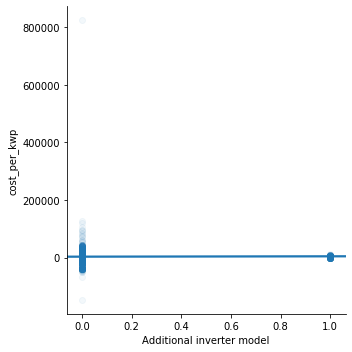

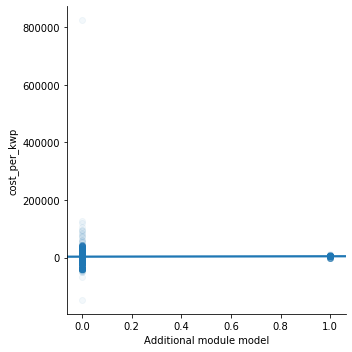

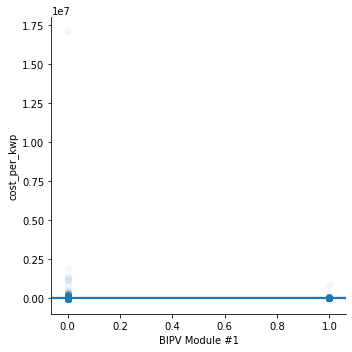

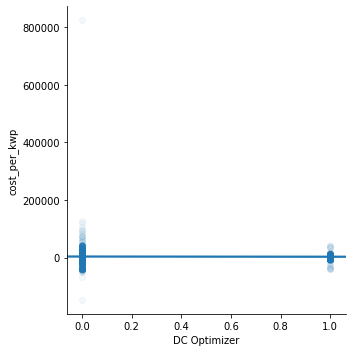

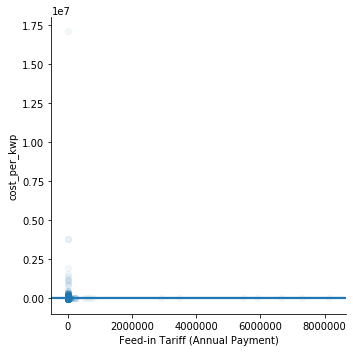

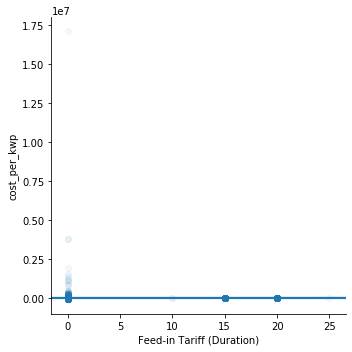

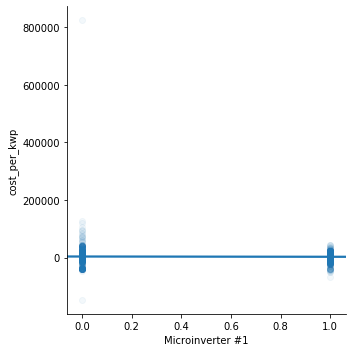

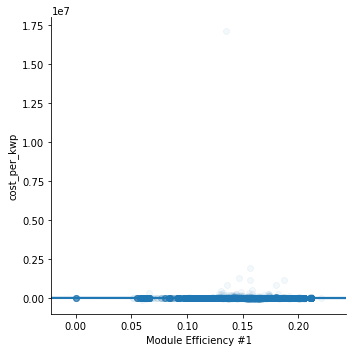

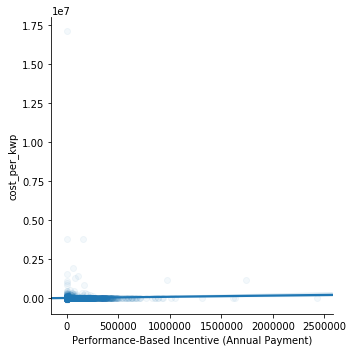

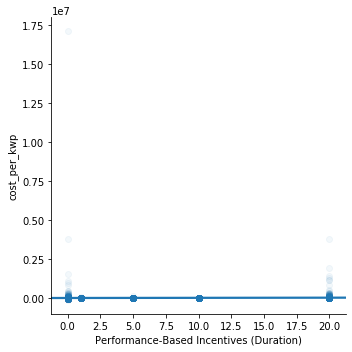

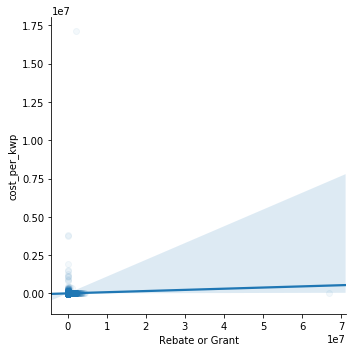

In [ ]:
# Make visualizations to explore relationships between features and target

numeric = train.select_dtypes('number')
for feature in numeric:
    sns.lmplot(x=feature, y=target, data=train, scatter_kws={'alpha':0.05})
    plt.show()

In [ ]:
# Make visualizations to explore relationships between features and target
plt.figure(figsize=(8,12))
train.groupby('State')['cost_per_kwp'].mean().sort_values().plot.barh();

In [ ]:
import statsmodels.api as sm

In [ ]:
x = sm.add_constant(X_train)

results = sm.OLS(y_train, x).fit()
results.summary()


In [ ]:
X_train.head()

In [ ]:
y_train.head()

In [ ]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape